# Task 1: Data Preparation

You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.

Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately.

###### (Please note that this is just a sample template, and please feel free to add more cells to complete of the sub-tasks in the assignment. The following existing cells are for example purposes only.)

In [1]:
# Import pandas library
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Load the data from the file NBA_players_stats.csv using pandas library.
file_path = "NBA_players_stats.csv"
data = pd.read_csv(file_path, sep=',', decimal='.')
data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,28800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,0.785,32,101,133,141,42,15,35,32,310
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,0.500,71,105,176,131,42,17,56,81,362
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,0.878,25,117,142,321,30,8,149,70,897
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,0.758,46,90,136,44,11,11,20,47,174


In [3]:
# Clean the data
data['Pos'] = data['Pos'].str.strip()
data['Pos'] = data['Pos'].str.upper()
#data['Pos'].value_counts()

data['Pos'] = data['Pos'].str.replace("SGA", "SG")
data['Pos'] = data['Pos'].str.replace("PFA", "PF")
data['Pos'] = data['Pos'].str.replace("SF.", "SF")
data['Pos'] = data['Pos'].str.replace("SFPF", "SF-PF")
#data['Pos'].value_counts()

data['Age'] = data['Age'].abs()
data['Age'] = data['Age'].replace(280, 28)
#data['Age'].sort_values()

data['Tm'] = data['Tm'].str.strip()
data['Tm'] = data['Tm'].str.upper()
data['Tm'] = data['Tm'].str.replace("H0U", "HOU")
#data['Tm'].value_counts()

data['PTS'] = data['PTS'].replace(20000, 2)
data['PTS'] = data['PTS'].replace(28800, 288)

#data.iloc[1]

In [9]:
def myfunc(x) :
    return x.values[0]


#Grouping players together
data = data.groupby('Player').agg({
'Rk'      : myfunc,
'Pos'     : myfunc,
'Age'     : myfunc,
'Tm'      : myfunc,
'G'       : np.sum,
'GS'      : np.sum,
'MP'      : np.sum,
'FG'      : np.sum,
'FGA'     : np.sum,
'FG%'     : np.average,
'3P'      : np.sum,
'3PA'     : np.sum,
'3P%'     : np.average,
'2P'      : np.sum,
'2PA'     : np.sum,
'2P%'     : np.average,
'FT'      : np.sum,
'FTA'     : np.sum,
'FT%'     : np.average,
'ORB'     : np.sum,
'DRB'     : np.sum,
'TRB'     : np.sum,
'AST'     : np.sum,
'STL'     : np.sum,
'BLK'     : np.sum,
'TOV'     : np.sum,
'PF'      : np.sum,
'PTS'     : np.sum,
})

data.loc["James Harden"]

Rk          182
Pos       PG-SG
Age          31
Tm          TOT
G            62
GS           62
MP         2346
FG          500
FGA        1034
FG%       0.475
3P          202
3PA         504
3P%        0.39
2P          298
2PA         530
2P%    0.560667
FT          366
FTA         426
FT%       0.864
ORB          52
DRB         432
TRB         484
AST         690
STL          72
BLK          42
TOV         262
PF          134
PTS        1568
Name: James Harden, dtype: object

In [43]:
"""
Make sure that you write the final cleaned dataframe object into a csv file
Please replace XXXXX with your dataframe variable.
"""
data.to_csv('cleaned_NBA_players_stats.csv', index=False)


# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

<AxesSubplot:xlabel='Player'>

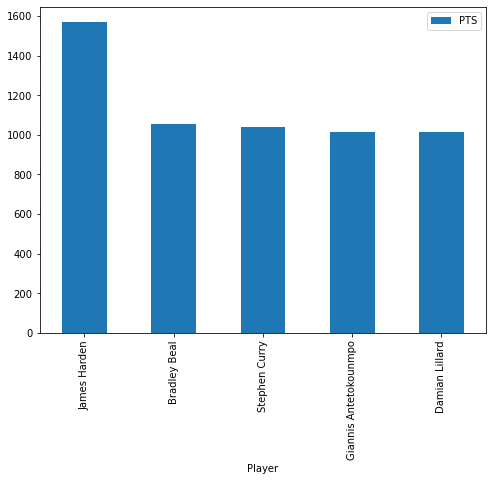

In [18]:
# Code goes after this line by adding cells
data.sort_values(by=['PTS'], ascending=False).head(5)["PTS"].array#.plot(kind='pie',autopct='%.2f')
#plt.title("Player")
#plt.show()
#data['PTS']
data.sort_values(by=['PTS'], ascending=False).head(5).plot.bar(y="PTS", figsize=(8,6))

## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.


In [8]:
# Code goes after this line by adding cells


## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.


In [9]:
# Code goes after this line by adding cells
